In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

In [2]:
def csv_values(filename):
    # Read the CSV file
    data = pd.read_csv(filename)
    
    labels = data[data.columns[0]].tolist() # KPI
    values = data[data.columns[2]].tolist() # Importance Value

    return labels, values

In [3]:
def plot_radar(labels,values):
    
    # Radar plot setup
    labels = [*labels, labels[0]]
    values = [*values, values[0]]

    angles = np.linspace(0, 2 * np.pi, num=len(labels))
    
    # Plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    
    fig.set_facecolor('black')
    ax.set_facecolor('black')
    ax.xaxis.grid(True, which='both', color='0.3')
    
    ax.spines['polar'].set_color('white')
    ax.spines['polar'].set(linewidth=5, zorder=100)

    # Setting numerical values and labels color to white
    ax.tick_params(axis='x', colors='white')  # For angular (categorical) labels
    ax.tick_params(axis='y', colors='white')  # For radial (numerical) labels
    
    # Setting labels
    plt.xticks(angles[:-1], labels[:-1], color='white')

    # Go through labels and set the rotation as well as a new position.
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        if np.pi/2 < angle < 3*np.pi/2:
            label.set_horizontalalignment('right')
        else:
            label.set_horizontalalignment('left')

    ax.plot(angles, values, color='g')
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.set_rmax(100)
    ax.set_rmin(-2)
    ax.set_rlim(0, 100)
    
    plt.show()

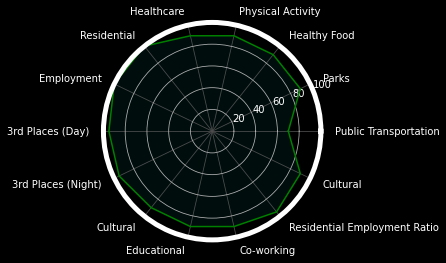

KeyboardInterrupt: 

In [4]:
# Use this function to create a plot
labels,values = csv_values('future_city_kpis.csv')
plot_radar(labels,values)
while True:
    time.sleep(1)
    labels_new,values_new = csv_values('future_city_kpis.csv')
    if values != values_new:
        labels,values = labels_new,values_new
        clear_output(wait=True)
        plot_radar(labels,values)